In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv('/content/mushroom_cleaned.csv')
df = pd.read_csv('mushroom_cleaned.csv')

In [3]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)
df.head()

Shape: (54035, 9)

Data types:
 cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [4]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [5]:
df.isna().sum()

,0
cap-diameter,0
cap-shape,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0
season,0
class,0


In [6]:
df['class'] = df['class'].astype(int)

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

cap-diameter: 1847 unique values
cap-shape: 7 unique values
gill-attachment: 7 unique values
gill-color: 12 unique values
stem-height: 1455 unique values
stem-width: 3510 unique values
stem-color: 13 unique values
season: 4 unique values
class: 2 unique values


In [8]:
import numpy as np

In [9]:
df['log_stem_height'] = np.log1p(df['stem-height'])
df['log_stem_width'] = np.log1p(df['stem-width'])

In [10]:
df = df.drop(['stem-height', 'stem-width'], axis=1)

In [11]:
X = df.drop('class', axis=1)
y = df['class']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

Decision Tree Modeling (Classification)

Maximal Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [14]:
tree_max = DecisionTreeClassifier(criterion='entropy', random_state=1)
tree_max.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [15]:
y_pred_max = tree_max.predict(X_val)
y_prob_max = tree_max.predict_proba(X_val)[:, 1]

In [16]:
accuracy_max = accuracy_score(y_val, y_pred_max)
ase_max = mean_squared_error(y_val, y_prob_max)

In [ ]:
print("Maximal Tree Accuracy:", round(accuracy_max, 4))
print("Maximal Tree ASE:", round(ase_max, 6))
print("Number of nodes:", tree_max.tree_.node_count)
print("Number of leaves:", tree_max.get_n_leaves())

Maximal Tree Accuracy: 0.9804
Maximal Tree ASE: 0.019616
Number of nodes: 1809
Number of leaves: 905


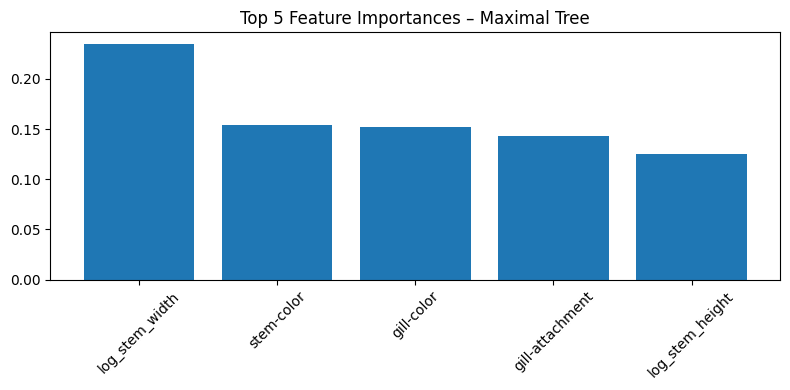

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importances = tree_max.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 4))
plt.bar(range(5), importances[indices[:5]])
plt.xticks(range(5), X.columns[indices[:5]], rotation=45)
plt.title("Top 5 Feature Importances – Maximal Tree")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import export_text

In [ ]:
tree_rules = export_text(tree_max, feature_names=list(X.columns), max_depth=3)
print(tree_rules)

|--- log_stem_width <= 6.59
|   |--- log_stem_height <= 0.58
|   |   |--- season <= 1.37
|   |   |   |--- gill-color <= 10.50
|   |   |   |   |--- truncated branch of depth 18
|   |   |   |--- gill-color >  10.50
|   |   |   |   |--- truncated branch of depth 12
|   |   |--- season >  1.37
|   |   |   |--- gill-attachment <= 3.00
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- gill-attachment >  3.00
|   |   |   |   |--- class: 1
|   |--- log_stem_height >  0.58
|   |   |--- stem-color <= 10.50
|   |   |   |--- log_stem_width <= 5.52
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- log_stem_width >  5.52
|   |   |   |   |--- truncated branch of depth 17
|   |   |--- stem-color >  10.50
|   |   |   |--- stem-color <= 11.50
|   |   |   |   |--- truncated branch of depth 13
|   |   |   |--- stem-color >  11.50
|   |   |   |   |--- truncated branch of depth 6
|--- log_stem_width >  6.59
|   |--- log_stem_height <= 0.97
|   |   |--- log_stem_width <= 7.88


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1)

In [ ]:
grid = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=1),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 10]})

In [ ]:
best_tree = grid.best_estimator_

In [ ]:
y_pred_ase = best_tree.predict(X_val)
y_prob_ase = best_tree.predict_proba(X_val)[:, 1]

In [ ]:
accuracy_ase = accuracy_score(y_val, y_pred_ase)
ase_ase = mean_squared_error(y_val, y_prob_ase)

In [ ]:
print("ASE Tree Accuracy:", round(accuracy_ase, 4))
print("ASE Tree ASE:", round(ase_ase, 6))
print("Best max_depth:", best_tree.get_params()['max_depth'])
print("Best min_samples_leaf:", best_tree.get_params()['min_samples_leaf'])
print("Number of nodes:", best_tree.tree_.node_count)
print("Number of leaves:", best_tree.get_n_leaves())

ASE Tree Accuracy: 0.9804
ASE Tree ASE: 0.018184
Best max_depth: 20
Best min_samples_leaf: 1
Number of nodes: 1573
Number of leaves: 787


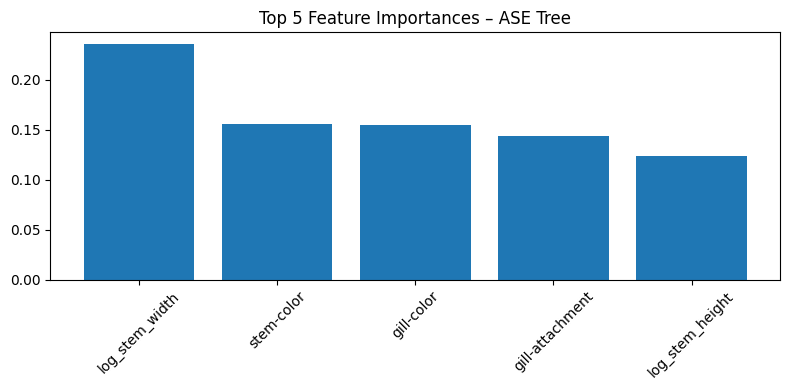

In [ ]:
importances = best_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 4))
plt.bar(range(5), importances[indices[:5]])
plt.xticks(range(5), X.columns[indices[:5]], rotation=45)
plt.title("Top 5 Feature Importances – ASE Tree")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.tree import _tree

In [ ]:
def print_leaf_paths(tree, feature_names, max_paths=3):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []

    def recurse(node, path, paths):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            left_path = path + [f"{name} <= {threshold:.2f}"]
            recurse(tree_.children_left[node], left_path, paths)

            right_path = path + [f"{name} > {threshold:.2f}"]
            recurse(tree_.children_right[node], right_path, paths)
        else:
            paths.append(path)

    recurse(0, [], paths)

    print(f"\nSample of {max_paths} leaf paths:\n")
    for i, path in enumerate(paths[:max_paths]):
        print(f"Path {i+1}:")
        for step in path:
            print(f"   - {step}")
        print()

In [ ]:
print_leaf_paths(best_tree, X.columns, max_paths=3)


Sample of 3 leaf paths:

Path 1:
   - log_stem_width <= 6.59
   - log_stem_height <= 0.58
   - season <= 1.37
   - gill-color <= 10.50
   - cap-shape <= 0.50
   - stem-color <= 10.50
   - gill-color <= 3.50
   - cap-diameter <= 260.50
   - log_stem_width <= 5.48

Path 2:
   - log_stem_width <= 6.59
   - log_stem_height <= 0.58
   - season <= 1.37
   - gill-color <= 10.50
   - cap-shape <= 0.50
   - stem-color <= 10.50
   - gill-color <= 3.50
   - cap-diameter <= 260.50
   - log_stem_width > 5.48
   - cap-diameter <= 235.50
   - cap-diameter <= 128.00

Path 3:
   - log_stem_width <= 6.59
   - log_stem_height <= 0.58
   - season <= 1.37
   - gill-color <= 10.50
   - cap-shape <= 0.50
   - stem-color <= 10.50
   - gill-color <= 3.50
   - cap-diameter <= 260.50
   - log_stem_width > 5.48
   - cap-diameter <= 235.50
   - cap-diameter > 128.00



Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=301248079)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=301248079)

In [45]:
rf_model.feature_importances_

array([0.12260384, 0.09404263, 0.14585369, 0.12809376, 0.12444366,
       0.03749037, 0.12115986, 0.22631218])

           feature  importance       std
5           season    0.037490  0.006554
1        cap-shape    0.094043  0.016156
6  log_stem_height    0.121160  0.015987
0     cap-diameter    0.122604  0.020290
4       stem-color    0.124444  0.024564
3       gill-color    0.128094  0.018957
2  gill-attachment    0.145854  0.026526
7   log_stem_width    0.226312  0.022446


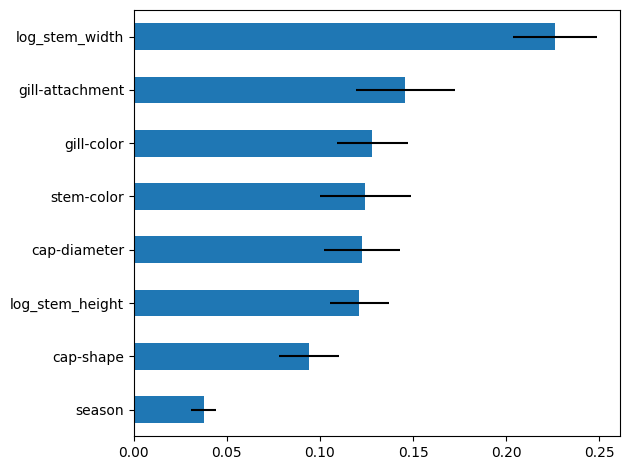

In [50]:
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [51]:
y_pred_rf = rf_model.predict(X_val)
y_prob_rf = rf_model.predict_proba(X_val)[:, 1]

In [52]:
accuracy_rf = accuracy_score(y_val, y_pred_rf)
ase_rf = mean_squared_error(y_val, y_prob_rf)

print("Random Forest Accuracy:", round(accuracy_rf, 4))
print("Random Forest ASE:", round(ase_rf, 6))

Random Forest Accuracy: 0.9906
Random Forest ASE: 0.009973


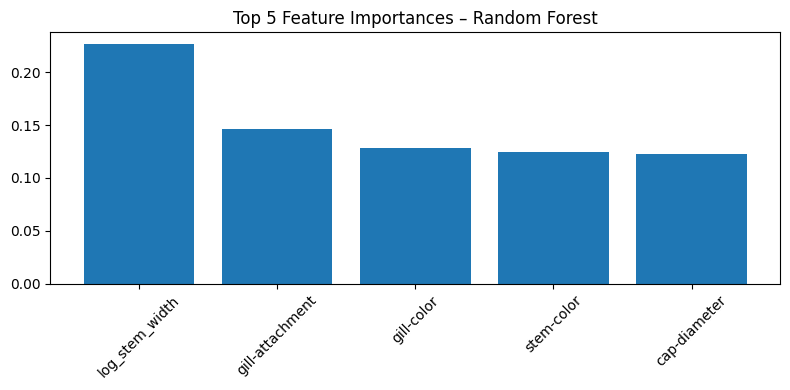

In [53]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 4))
plt.bar(range(5), importances[indices[:5]])
plt.xticks(range(5), X.columns[indices[:5]], rotation=45)
plt.title("Top 5 Feature Importances – Random Forest")
plt.tight_layout()
plt.show()

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=1)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='liblinear')

In [28]:
log_model.intercept_

array([3.55508361])

In [29]:
log_model.coef_

array([[-7.13793104e-05, -8.80447973e-02,  2.32839999e-02,
        -6.23073987e-03, -6.12265150e-02, -5.07997086e-01,
         1.32943538e+00, -3.96790967e-01]])

In [30]:
pd.DataFrame({'coef': log_model.coef_[0]}, index=X.columns)

,coef
cap-diameter,-0.000071
cap-shape,-0.088045
gill-attachment,0.023284
gill-color,-0.006231
stem-color,-0.061227
season,-0.507997
log_stem_height,1.329435
log_stem_width,-0.396791


In [31]:
pd.DataFrame({'coef': log_model.coef_[0], 'odds': np.e**log_model.coef_[0], 'variable': X.columns})

,coef,odds,variable
0,-0.000071,0.999929,cap-diameter
1,-0.088045,0.915720,cap-shape
2,0.023284,1.023557,gill-attachment
3,-0.006231,0.993789,gill-color
4,-0.061227,0.940610,stem-color
5,-0.507997,0.601700,season
6,1.329435,3.778909,log_stem_height
7,-0.396791,0.672475,log_stem_width


In [ ]:
y_pred_log = log_model.predict(X_val)
y_prob_log = log_model.predict_proba(X_val)[:, 1]

In [ ]:
accuracy_log = accuracy_score(y_val, y_pred_log)
ase_log = mean_squared_error(y_val, y_prob_log)

print("Logistic Regression Accuracy:", round(accuracy_log, 4))
print("Logistic Regression ASE:", round(ase_log, 6))

Logistic Regression Accuracy: 0.6292
Logistic Regression ASE: 0.221959


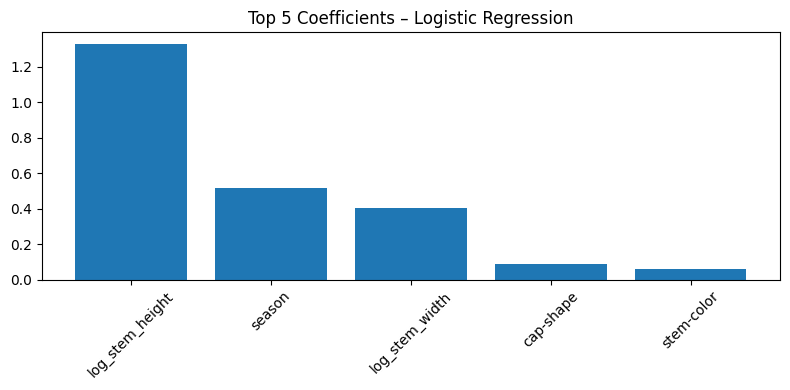

In [ ]:
coef = np.abs(log_model.coef_[0])
indices = np.argsort(coef)[::-1]

plt.figure(figsize=(8, 4))
plt.bar(range(5), coef[indices[:5]])
plt.xticks(range(5), X.columns[indices[:5]], rotation=45)
plt.title("Top 5 Coefficients – Logistic Regression")
plt.tight_layout()
plt.show()

Neural Networks

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=1, activation= "logistic")
nn_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
              random_state=1)

In [38]:
y_pred_nn = nn_model.predict(X_val)
y_prob_nn = nn_model.predict_proba(X_val)[:, 1]

In [39]:
accuracy_nn = accuracy_score(y_val, y_pred_nn)
ase_nn = mean_squared_error(y_val, y_prob_nn)

In [40]:
print("Neural Network Accuracy:", round(accuracy_nn, 4))
print("Neural Network ASE:", round(ase_nn, 6))

Neural Network Accuracy: 0.7407
Neural Network ASE: 0.176319
